<a href="https://colab.research.google.com/github/DariNGplus/cd_202202_hernando_duran/blob/main/TallerHeatmapFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd

route = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(route)

In [14]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [15]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [16]:
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format= "%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format= "%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format= "%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format= "%d/%m/%Y")

In [17]:
import pyproj

P = pyproj.Proj(proj='utm', zone = 18, ellps='WGS84', preserve_units=True)

In [18]:

df['x'], df['y'] = P(df['longitud'], df['latitud'])


df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fec_hos_2,fecha_contagio2,inicio_sintomas2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,NaT,2020-01-17,2020-01-10,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,NaT,2020-01-10,2020-01-07,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,NaT,2020-01-12,2020-01-08,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,NaT,2020-01-10,2020-01-06,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,2020-01-07,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,NaT,2020-03-06,2020-03-03,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,2020-03-06,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,NaT,2020-03-08,2020-03-04,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,NaT,2020-03-11,2020-03-05,710198.574916,780930.648555


In [19]:
import math

alc = [7.06304, -73.08619]
alc = P(alc[1], alc[0])

dist_alc = []

for i in range(df.shape[0]):
  dist_alc.append(math.sqrt((df['x'].iloc[i]-alc[0])**2 + (df['y'].iloc[i] - alc[1])**2))

df['dist_alc'] = dist_alc


In [20]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,conducta,latitud,longitud,fec_not2,fec_hos_2,fecha_contagio2,inicio_sintomas2,x,y,dist_alc
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,1. Ambulatorio,7.076011,-73.102501,2020-01-17,NaT,2020-01-17,2020-01-10,709584.027559,782579.281866,2303.605662
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,1. Ambulatorio,7.079495,-73.105400,2020-01-10,NaT,2020-01-10,2020-01-07,709262.121378,782963.354103,2796.108362
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,1. Ambulatorio,7.090290,-73.091003,2020-01-12,NaT,2020-01-12,2020-01-08,710847.924654,784163.825097,3060.637975
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,1. Ambulatorio,7.067435,-73.090958,2020-01-12,NaT,2020-01-10,2020-01-06,710863.366771,781635.895608,716.810900
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,2020-01-07,709314.159319,781570.969374,2119.829091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1. Ambulatorio,7.072610,-73.099487,2020-03-07,NaT,2020-03-06,2020-03-03,709918.546763,782204.438977,1810.871540
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,2020-03-06,709466.644754,781388.734012,1940.023295
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,1. Ambulatorio,7.091391,-73.103264,2020-03-08,NaT,2020-03-08,2020-03-04,709492.782783,784279.996264,3659.540975
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,1. Ambulatorio,7.061083,-73.097000,2020-03-11,NaT,2020-03-11,2020-03-05,710198.574916,780930.648555,1213.935423


In [21]:
#1
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P
#2
def kde_epanechnikov(d,h):
    dn=d/h
    P=(3/4)*(1-dn**2)
    return P
#3
def kde_gaussian(d,h):
    dn=d/h
    P=math.e**(-(dn**2)/2)/math.sqrt(2*math.pi)
    return P
#4
def kde_bebesos(d,h):
    dn=d/h
    P=3/8(3-5*dn**2)
    return P
#5
def kde_uniform():
  return 0.5
  
#6
def kde_triangular(d,h):
  dn = d/h
  return 1-abs(dn)

In [32]:
import numpy

bw = 50
res = 5

kernel_function = 2

xmin = df['x'].min() - bw
xmax = df['x'].max() + bw

ymin = df['y'].min() - bw
ymax = df['y'].max() + bw

rows = int(math.ceil(ymax-ymin)/res)

cols = int(math.ceil(xmax-xmin)/res)

map = numpy.zeros((rows, cols))

In [33]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

for i in range(df.shape[0]):
  curRow = int(math.floor((df['y'].iloc[i] - ymin)/res))
  curCol = int(math.floor((df['x'].iloc[i] - xmin)/res))
  ##print( str(curRow)+ " , " +str(curCol))
  map[curRow, curCol] += 1


In [34]:
amap = numpy.zeros((rows, cols))
kernel = 0


for i in range(0, len(amap)):
  for j in range(0, len(amap[i])):
    for k in range(max(0, int(i-(bw/res))), min(rows, int(i+(bw/res)))):
      for l in range(max(0, int(j-(bw/res))), min(cols, int(j+(bw/res)))):
        
        d = math.sqrt((k-i)**2 + (l-j)**2)

        
        if (kernel_function == 1):
          kernel = kde_quartic(d, bw)
        elif (kernel_function == 2):
          kernel = kde_epanechnikov(d,bw)
        elif (kernel_function == 3):
          kernel = kde_gaussian(d, bw)
        elif (kernel_function == 4):
          kernel = kde_bebesos(d, bw)
        elif (kernel_function == 5):
          kernel = kde_uniform()
        elif (kernel_function == 6):
          kernel = kde_triangular(d, bw)

        amap[i][j] += map[k][l]*kernel/(math.pi*bw**2)
       

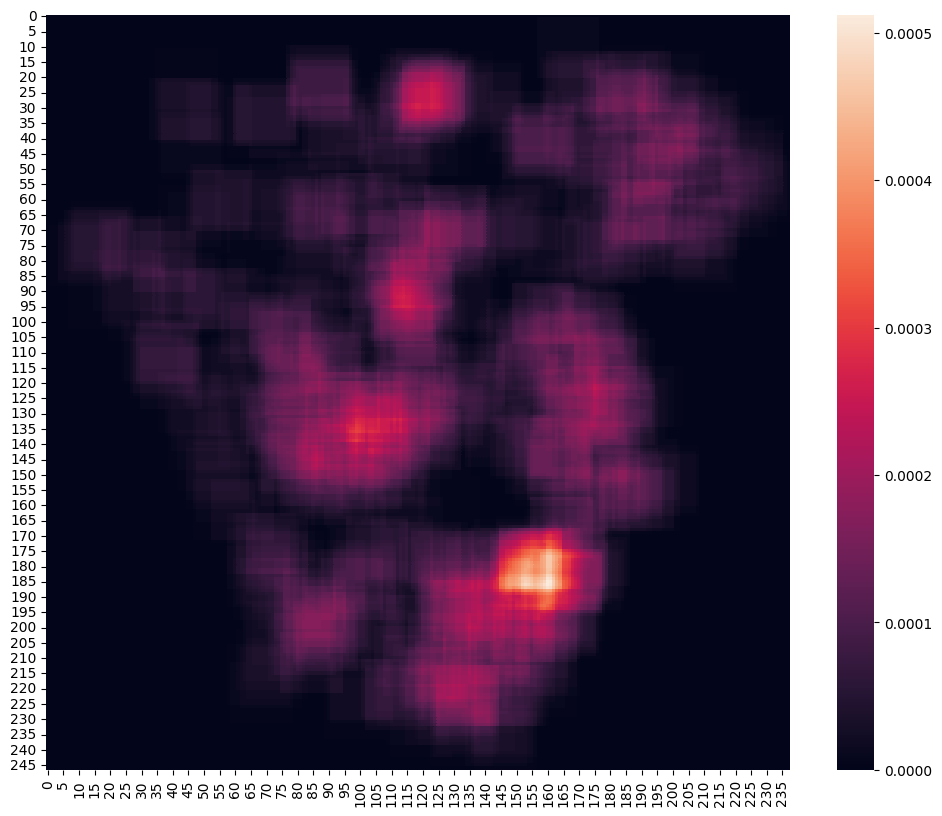

In [31]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()